In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
#create normally distributed data with same standard deviation
mu_a = 3
sigma_a=4
data_a = np.random.normal(loc=mu_a, scale=sigma_a, size=1000)
#create data b 
mu_b = 5
sigma_b = 4
data_b = np.random.normal(loc=mu_b, scale=sigma_b, size=1000)


<AxesSubplot:ylabel='Density'>

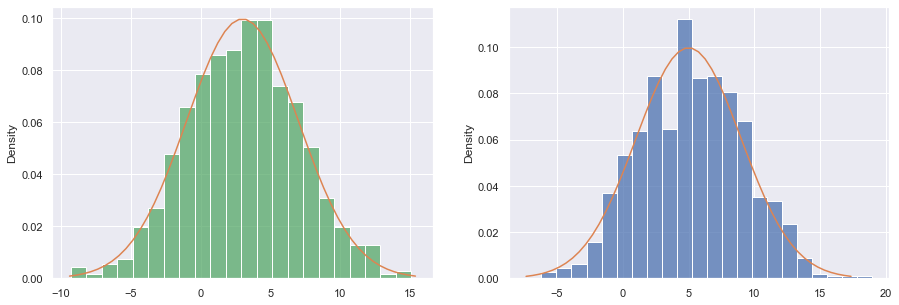

In [16]:
#Visualization
fig, ax = plt.subplots(1, 2, figsize=[15,5])

range_a = np.linspace(stats.norm.ppf(0.001, mu_a, sigma_a), stats.norm.ppf(0.999, mu_a, sigma_a))
range_b = np.linspace(stats.norm.ppf(0.001, mu_b, sigma_b), stats.norm.ppf(0.999, mu_b, sigma_b))
ax[1].plot(range_b, stats.norm.pdf(range_b, loc=mu_b, scale=sigma_b), color='C1')
ax[0].plot(range_a, stats.norm.pdf(range_a, loc=mu_a, scale=sigma_a), color='C1')
sns.histplot(data_a, ax=ax[0], color='C2' , stat='density')
sns.histplot(data_b, ax=ax[1],stat='density')

<AxesSubplot:ylabel='Density'>

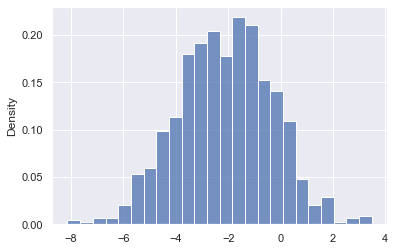

In [20]:
l_means = []
for _ in (range(1000)):
    smp_a = np.random.choice(data_a, 10)
    smp_b = np.random.choice(data_b, 10)
    l_means.append(smp_a.mean() - smp_b.mean())
lmeans = np.array(l_means)
sns.histplot(lmeans, stat='density')

## Test of equality of two means

### Pooled two-sample $t$-test
Two *independent samples* from two *normal distributions* with *equal variances*:
$$\sigma_X^2 = \sigma_Y^2 = \sigma$$
then:
$$T=\frac{(\bar{X}-\bar{Y})-(\mu_X - \mu_Y)}{S_p\sqrt{\frac{1}{n}+\frac{1}{m}}}$$
where $S^2_p$ is the pooled sample variance, an unbiased estimator of the common variance $\sigma^2$:
$$
S^2_p = \frac{(n-1)S^2_X + (m-1)S^2_Y}{n+m-2}
$$

### calculation from scratch

In [21]:
#calculation from scratch
#create normally distributed data with same standard deviation
n = 1000
m = 1000

#create data a
mu_a = 5
sigma_a=4
data_a = np.random.normal(loc=mu_a, scale=sigma_a, size=n)
#create data b 
mu_b = 5
sigma_b = 4
data_b = np.random.normal(loc=mu_b, scale=sigma_b, size=m)

sp = np.sqrt(((n-1)*np.var(data_a, ddof=1) + (m-1)*np.var(data_b, ddof=1))/(n+ m -2))

T = (np.mean(data_a) - np.mean(data_b))/(sp * np.sqrt(1/n + 1/m))
T, 2*(1-stats.t.cdf(T, df=(n+m-2)))

(0.14502315473434588, 0.8847072175967754)

### calculaton with scipy

In [22]:
stats.ttest_ind(data_a, data_b, equal_var = True)

Ttest_indResult(statistic=0.14502315473434588, pvalue=0.8847072175967756)

# ANOVA

### One way ANOVA
Comparing 2 means of independent unrelated groups 

In [23]:
# defining 3 groups with different means:

# group size
size = 100

mu_a = 5
sigma_a=4
group_a = np.random.normal(loc=mu_a, scale=sigma_a, size=size)

mu_b = 4
sigma_b=4
group_b = np.random.normal(loc=mu_b, scale=sigma_b, size=size)
mu_c = 4.5
sigma_c=4

group_c = np.random.normal(loc=mu_c, scale=sigma_c, size=size)

groups = [group_a, group_b, group_c]

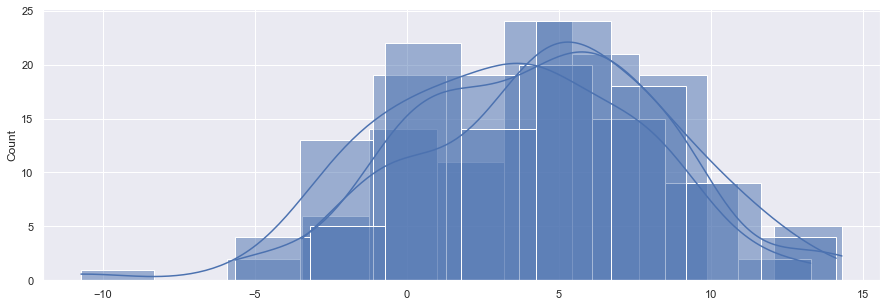

In [25]:
#Visualization
fig, ax = plt.subplots(1, 1, figsize=[15,5])
for i, group in enumerate(groups, 1):
    sns.histplot(group, kde=True)


In [46]:
# scipy.stats:
stats.f_oneway(group_a, group_b, group_c)

F_onewayResult(statistic=5.63470489555496, pvalue=0.003964274608520181)

## Linear regression with statsmodels

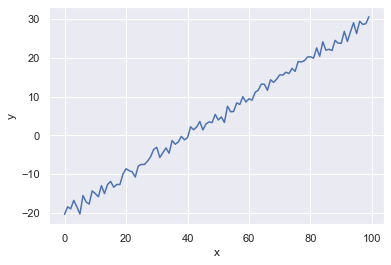

In [14]:
x = np.arange(100)
y= 0.5*x -20 + np.random.randn(len(x))
df = pd.DataFrame({'x':x, 'y':y})
sns.lineplot(x=df.x, y=df.y)

In [17]:
model = sm.ols('y~x', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.793e+04
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          8.50e-113
Time:                        18:21:36   Log-Likelihood:                -148.91
No. Observations:                 100   AIC:                             301.8
Df Residuals:                      98   BIC:                             307.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.1782      0.215    -93.804      0.000     -20.605     -19.751
x              0.5027      0.004    133.921      0.000       0.495       0.510
==============================================================================
Omnibus:                        1.467   Durbin-Watson:                   2.412
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.263
Skew:                          -0.100   Prob(JB):                        0.532
Kurtosis:                       2.487   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What do the parameters mean?

- **R-squared**
- **Adj. R-squared**: also adjusts for the number of terms in a model.
$$
R^2_{adj} = 1- \left[\frac{(1-R^2)(n-1)}{n-k-1} \right]
$$